# Projet 3 - Préparez des données pour un organisme de santé publique

Problématique: La problématique est d'améliorer la base de données Open Food Facts en nettoyant et explorant les données. 


- Filtrer les variables et les produits non pertinents 

 Vous pouvez identifier les variables qui ne sont pas pertinentes pour l'analyse et les exclure de votre jeu de données. De même, vous pouvez filtrer les produits qui ne sont pas nécessaires pour votre étude.




- Traiter les valeurs aberrantes

 Les valeurs aberrantes sont des données qui diffèrent considérablement des autres observations dans votre jeu de données. Vous pouvez les visualiser et définir des seuils d'anomalies pour les identifier et décider de les supprimer ou de les traiter d'une autre manière appropriée.




- Gérer les valeurs manquantes

 Les valeurs manquantes sont des données qui sont absentes pour certaines observations. Il est important de vérifier si la présence ou l'absence de ces valeurs manquantes est aléatoire ou non. Ensuite, vous pouvez imputer ces valeurs manquantes en utilisant des méthodes statistiques ou automatiques appropriées.



In [31]:
# %pip install pandas numpy scikit-learn matplotlib seaborn*
# %pip install skimpy
# %pip install missingno

In [32]:
# Import des librairies
import pandas as pd
import seaborn as sns
from skimpy import skim
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# Lecture du dataframe
df_origin = pd.read_csv('openfoodfacts_dataset.csv', sep='\t')

# Faire une copie du dataframe pour garder le dataframe original intact de toute modification
df = df_origin.copy()
df.head()

C:\Users\vuill\AppData\Local\Temp\ipykernel_32916\3293951688.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_origin = pd.read_csv('openfoodfacts_dataset.csv', sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
stats = df.describe()
stats

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


Il semble y avoir beacoup de valeur manquante en regardant le resultat de describe, nous allons donc afficher la heatmap des valeurs manquantes

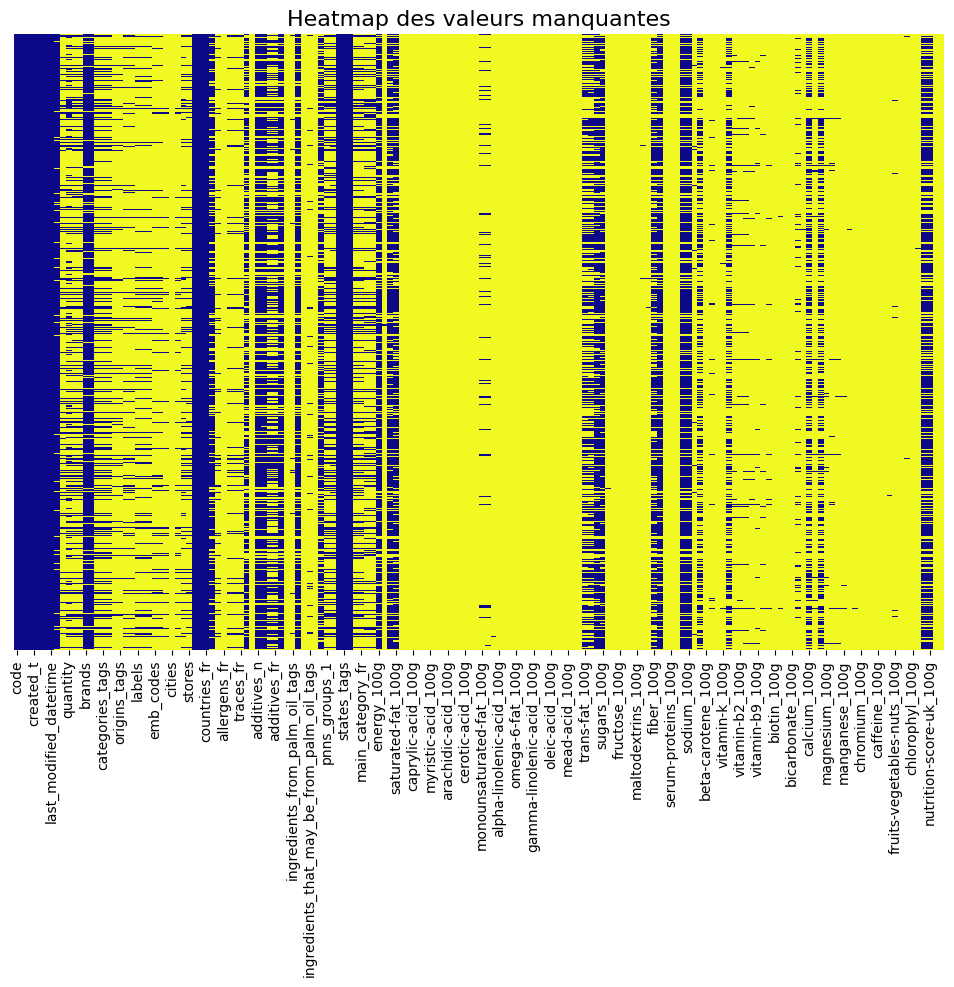

In [35]:
# Faire une Heatmap des valeurs manquantes de tout le df
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.sample(10_000).isnull(), cmap='plasma', cbar=False, yticklabels=False)
plt.title('Heatmap des valeurs manquantes', fontsize=16)

plt.show()


In [36]:
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percent = df.isnull().mean() * 100
X = 90

# Filtrer les colonnes qui ont plus de 90 % de valeurs manquantes
cols_with_many_missing = missing_percent[missing_percent > X].index

# Afficher les colonnes concernées
print(f"Colonnes avec plus de {X}% de valeurs manquantes : {len(cols_with_many_missing)}")

df = df.drop(columns=cols_with_many_missing)

Colonnes avec plus de 90% de valeurs manquantes : 100


In [39]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 320772 │ │ string      │ 39    │                                                          │
│ │ Number of columns │ 59     │ │ float64     │ 20    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃        ┃       ┃          ┃         ┃          ┃        ┃         ┃          ┃         ┃        ┃  │
│ ┃ ame      ┃ NA     ┃ NA %  ┃ mean     ┃ sd      ┃ p0       ┃ p25    ┃ p50     ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ additive │  71833 │ 22.39 │    1.936 │   2.502 │        0 │      0 │       1 │        3 │      31 │   ▇▁   │  │
│ │ s_n      │        │       │          │         │          │        │         │          │         │        │  │
│ │ ingredie │  71833 │ 22.39 │  0.01966 │  0.1405 │        0 │      0 │       0 │        0 │       2 │   ▇    │  │
│ │ nts_from │        │       │          │         │          │        │         │          │         │        │  │
│ │ _palm_oi │        │       │          │         │          │        │         │          │         │        │  │
│ │ l_n      │        │       │          │         │          │        │         │          │         │        │  │
│ │ ingredie │  71833 │ 22.39 │  0.05525 │  0.2692 │        0 │      0 │       0 │        0 │       6 │   ▇    │  │
│ │ nts_that │        │       │          │         │          │        │         │          │         │        │  │
│ │ _may_be_ │        │       │          │         │          │        │         │          │         │        │  │
│ │ from_pal │        │       │          │         │          │        │         │          │         │        │  │
│ │ m_oil_n  │        │       │          │         │          │        │         │          │         │        │  │
│ │ energy_1 │  59659 │  18.6 │     1142 │    6447 │        0 │    377 │    1100 │     1674 │ 3251000 │   ▇    │  │
│ │ 00g      │        │       │          │         │          │        │         │          │         │        │  │
│ │ fat_100g │  76881 │ 23.97 │    12.73 │   17.58 │        0 │      0 │       5 │       20 │   714.3 │   ▇    │  │
│ │ saturate │  91218 │ 28.44 │     5.13 │   8.014 │        0 │      0 │    1.79 │     7.14 │     550 │   ▇    │  │
│ │ d-fat_10 │        │       │          │         │          │        │         │          │         │        │  │
│ │ 0g       │        │       │          │         │          │        │         │          │         │        │  │
│ │ trans-fa │ 177474 │ 55.33 │  0.07348 │    1.54 │    -3.57 │      0 │       0 │        0 │     369 │   ▇    │  │
│ │ t_100g   │        │       │          │         │          │        │         │          │         │        │  │
│ │ choleste │ 176682 │ 55.08 │  0.02007 │  0.3581 │        0 │      0 │       0 │     0.02 │   95.24 │   ▇    │  │
│ │ rol_100g │        │       │          │         │          │        │         │          │         │        │  │
│ │ carbohyd │  77184 │ 24.06 │    32.07 │   29.73 │    

In [38]:
# Afficher les colonnes avec le nombre de valeurs manquantes
missing_counts = df.isnull().sum()

# Trier les colonnes par le nombre de valeurs manquantes et afficher les 10 premières
least_missing = missing_counts.sort_values().head(15)

print(least_missing)

last_modified_t               0
last_modified_datetime        0
creator                       2
created_t                     3
created_datetime              9
code                         23
url                          23
states                       46
states_tags                  46
states_fr                    46
countries_fr                280
countries                   280
countries_tags              280
product_name              17762
brands                    28412
dtype: int64
